In [1]:
import pandas as pd
import math

**Step 1: reading the dataset from .csv file**

In [2]:
movies = pd.read_csv('imdb_top_1000.csv')

In [3]:
movies.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


**Step 2: cleaning and preprocessing the data**

Showing NAs distribution

In [4]:
movies.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

Checking the unique values of the 'Certificate' column

In [5]:
movies['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [6]:
movies.groupby('Certificate').size().sort_values(ascending=False)

Certificate
U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
16            1
TV-14         1
TV-MA         1
U/A           1
Unrated       1
dtype: int64

It seems that the 'Certificate' column is not needed, so I'll drop it

In [7]:
movies = movies.drop('Certificate', axis=1)

I'll replace NAs in 'Meta_score' with the mean value of this column

In [8]:
meta_score_mean = movies['Meta_score'].mean()
meta_score_mean

77.97153024911032

In [9]:
movies['Meta_score'] = movies['Meta_score'].fillna(meta_score_mean)

In [10]:
movies['Meta_score'].isna().sum()

0

'Gross' columns is of type object (string), so I'll convert its values from string to float then replace NAs with the mean value

In [11]:
movies['Gross'] = movies['Gross'].str.replace(',', '').astype(float)


In [12]:
gross_mean = math.floor(movies['Gross'].mean())
gross_mean

68034750

In [13]:
movies['Gross'] = movies['Gross'].fillna(gross_mean)

**Step 3: Most popular genre (based on the number of votes)**

In [14]:
genre_popularity = movies.groupby('Genre')['No_of_Votes'].max().sort_values(ascending = False)
genre_popularity

Genre
Drama                        2343110
Action, Crime, Drama         2303232
Action, Adventure, Sci-Fi    2067042
Crime, Drama                 1826188
Drama, Romance               1809221
                              ...   
Thriller                       27733
Action, Crime, Comedy          27721
Animation, Drama, Romance      27071
Comedy, Crime, Mystery         26642
Animation, Sci-Fi              25229
Name: No_of_Votes, Length: 202, dtype: int64

Most popular genre is:

In [15]:
most_popular_genre = genre_popularity.keys()[0]
most_popular_genre

'Drama'

**Step 4: counting movies/shows for each genre**

In [16]:
movies['Genre'].unique()

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
       'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
       'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
       'Action, Drama, Mystery', 'Drama, Family, Fantasy', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Animation, Drama, War',
       'Adventure, Comedy, Sci-Fi', 'Horror, Mystery, Thriller',
       'Drama, Romance, War', 'Comedy, Drama, Family',
       'Animation, Drama, Fantasy', 'Action, Biography, Drama',
       'Animation, Action, Adventure', 'Drama, Western',


it seems that there is some overlapping between the genres
so I'll seperate them

In [17]:
unique_genres = pd.Series(movies['Genre'].str.split(', ').explode().unique(), name = 'Genre')
genre_counts = pd.DataFrame(unique_genres)
genre_counts

,Genre
0,Drama
1,Crime
2,Action
3,Adventure
4,Biography
5,History
6,Sci-Fi
7,Romance
8,Western
9,Fantasy


now I'll count the number of movies/show for each genre then sort them

In [18]:
genre_counts['Count'] = genre_counts['Genre'].apply(lambda genre: len(movies[movies['Genre'].str.contains(genre)]))
genre_counts

,Genre,Count
0,Drama,724
1,Crime,209
2,Action,189
3,Adventure,196
4,Biography,109
5,History,56
6,Sci-Fi,67
7,Romance,125
8,Western,20
9,Fantasy,66


In [19]:
genre_counts = genre_counts.sort_values(by = 'Count', ascending = False).reset_index(drop = True)
genre_counts

,Genre,Count
0,Drama,724
1,Comedy,233
2,Crime,209
3,Adventure,196
4,Action,189
5,Thriller,137
6,Romance,125
7,Biography,109
8,Mystery,99
9,Animation,82


**Step 5: visualizing the genres popularity (based on the number of movies/shows)**

In [20]:
import matplotlib.pyplot as plt

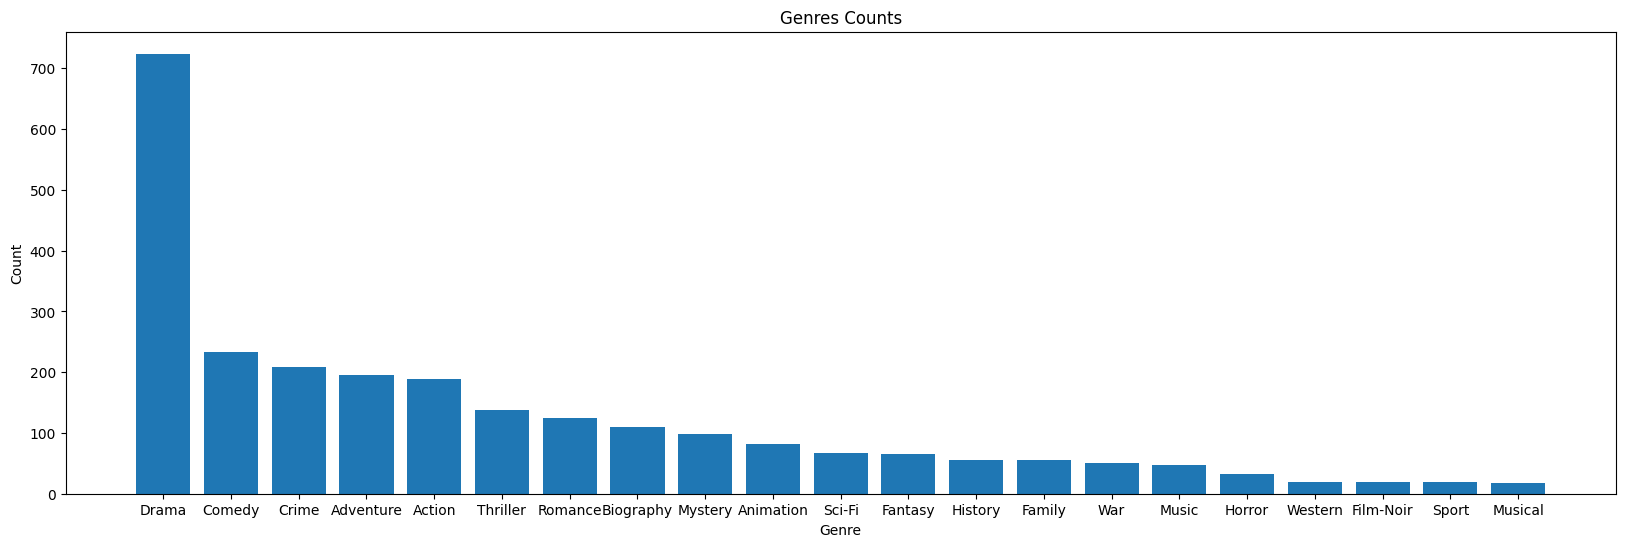

In [21]:
plt.figure(figsize = (20, 6))
plt.bar(genre_counts['Genre'], genre_counts['Count'])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genres Counts')
plt.show()

**Step 6: Director movies/shows count**

In [22]:
movie_director_count = movies.groupby('Director').size().sort_values(ascending = False).reset_index().rename(columns = {0: 'Count'})
movie_director_count

,Director,Count
0,Alfred Hitchcock,14
1,Steven Spielberg,13
2,Hayao Miyazaki,11
3,Martin Scorsese,10
4,Akira Kurosawa,10
...,...,...
543,Jessie Nelson,1
544,Jeong-beom Lee,1
545,Jemaine Clement,1
546,Jeethu Joseph,1


**Step 7: Visualizing movies/shows for each director**

Since the data is too large to be fit in one chart, I'll slice it into multiple slices and blot each slice individually

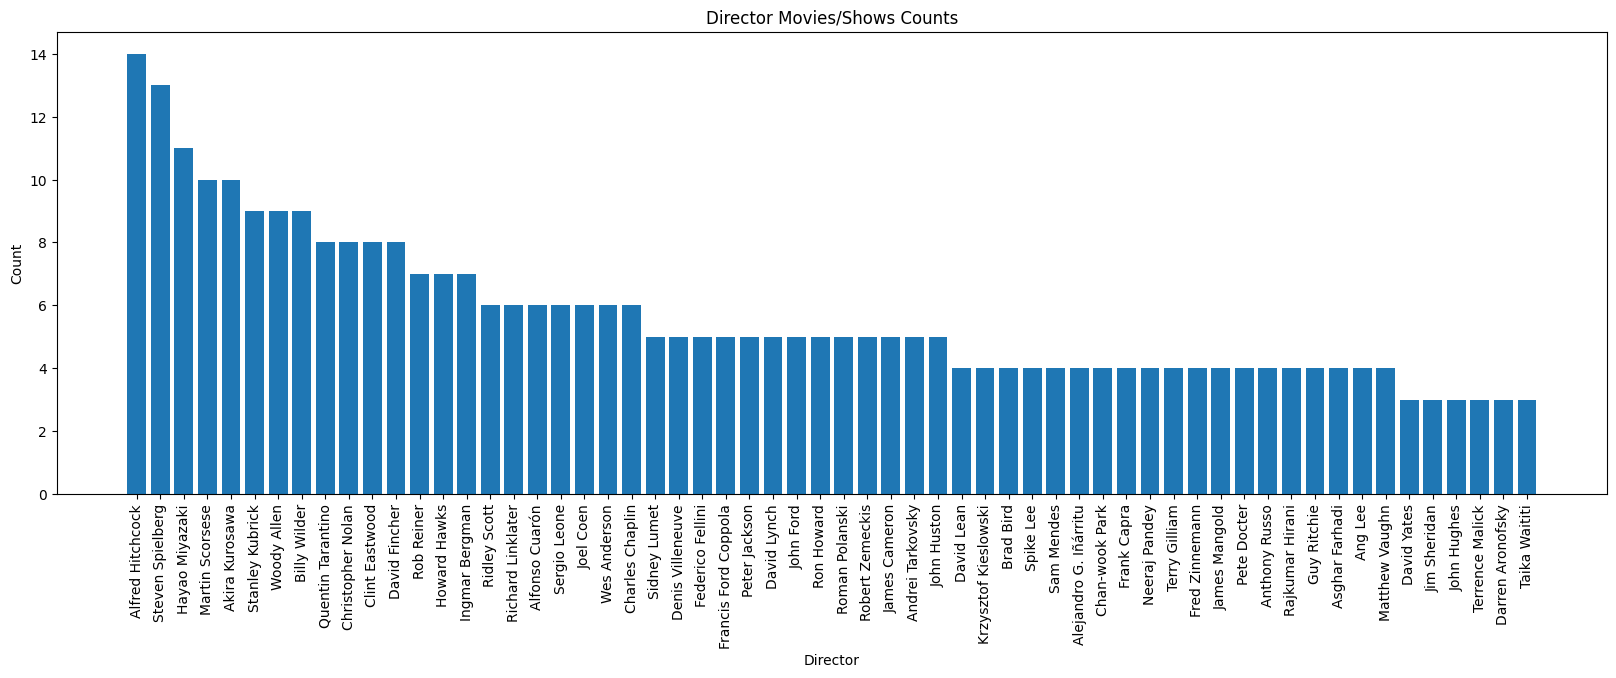

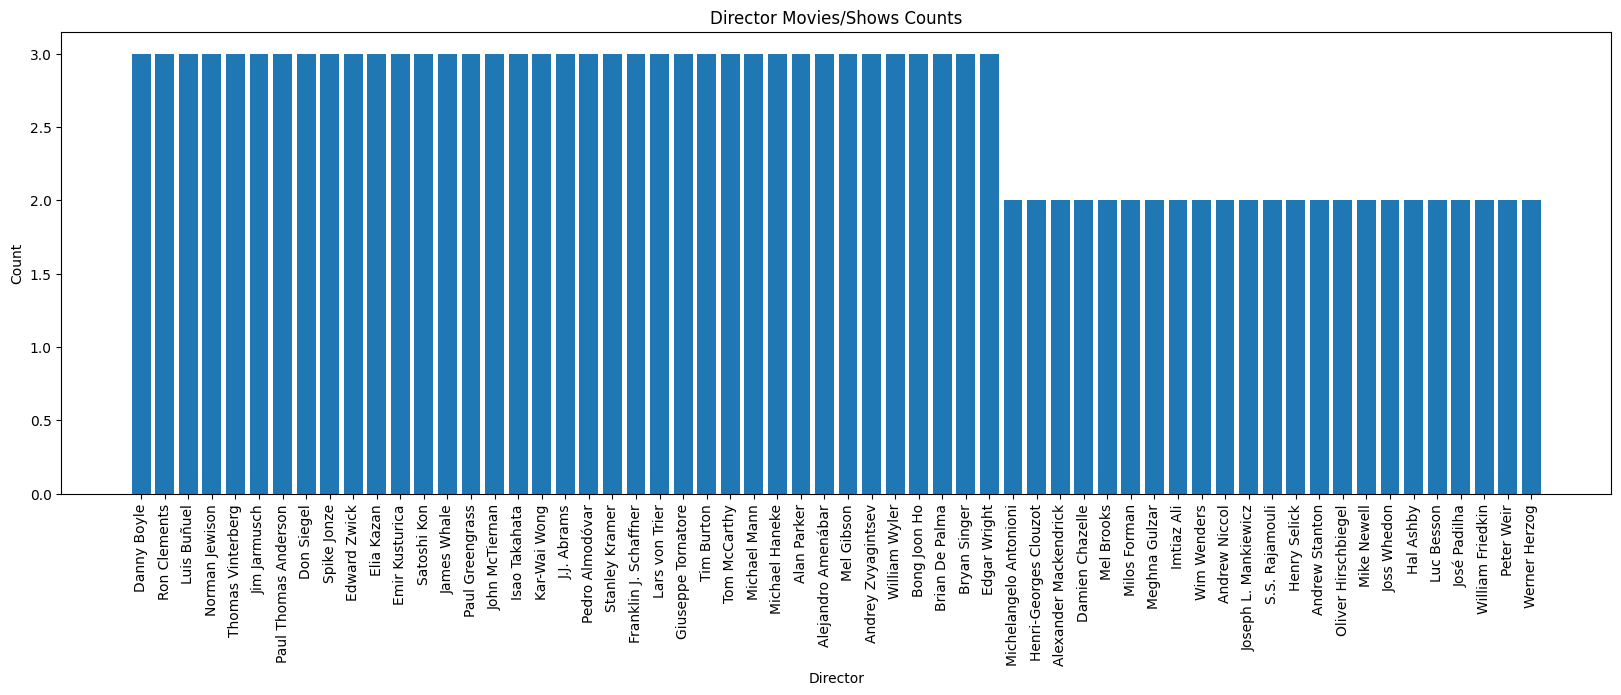

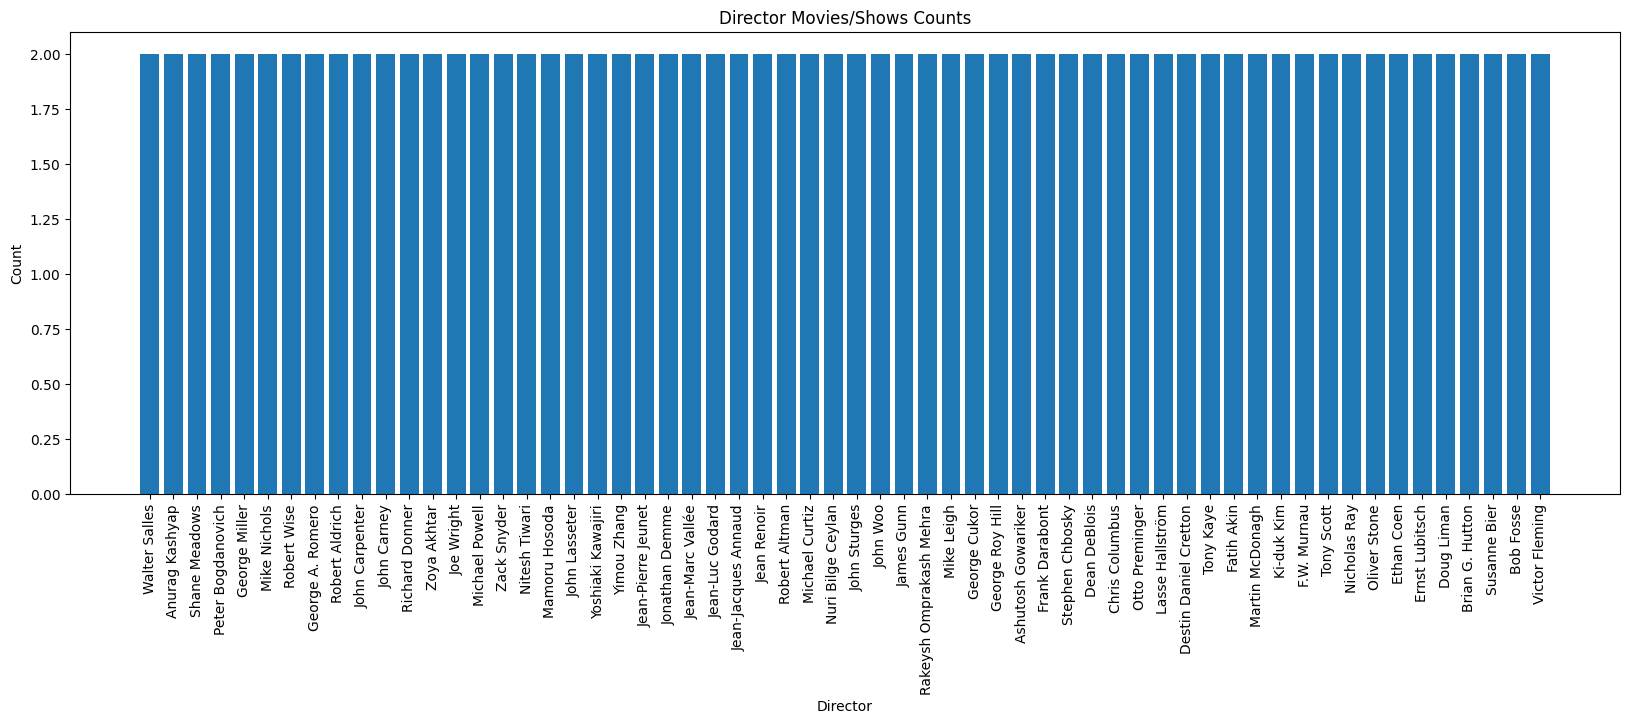

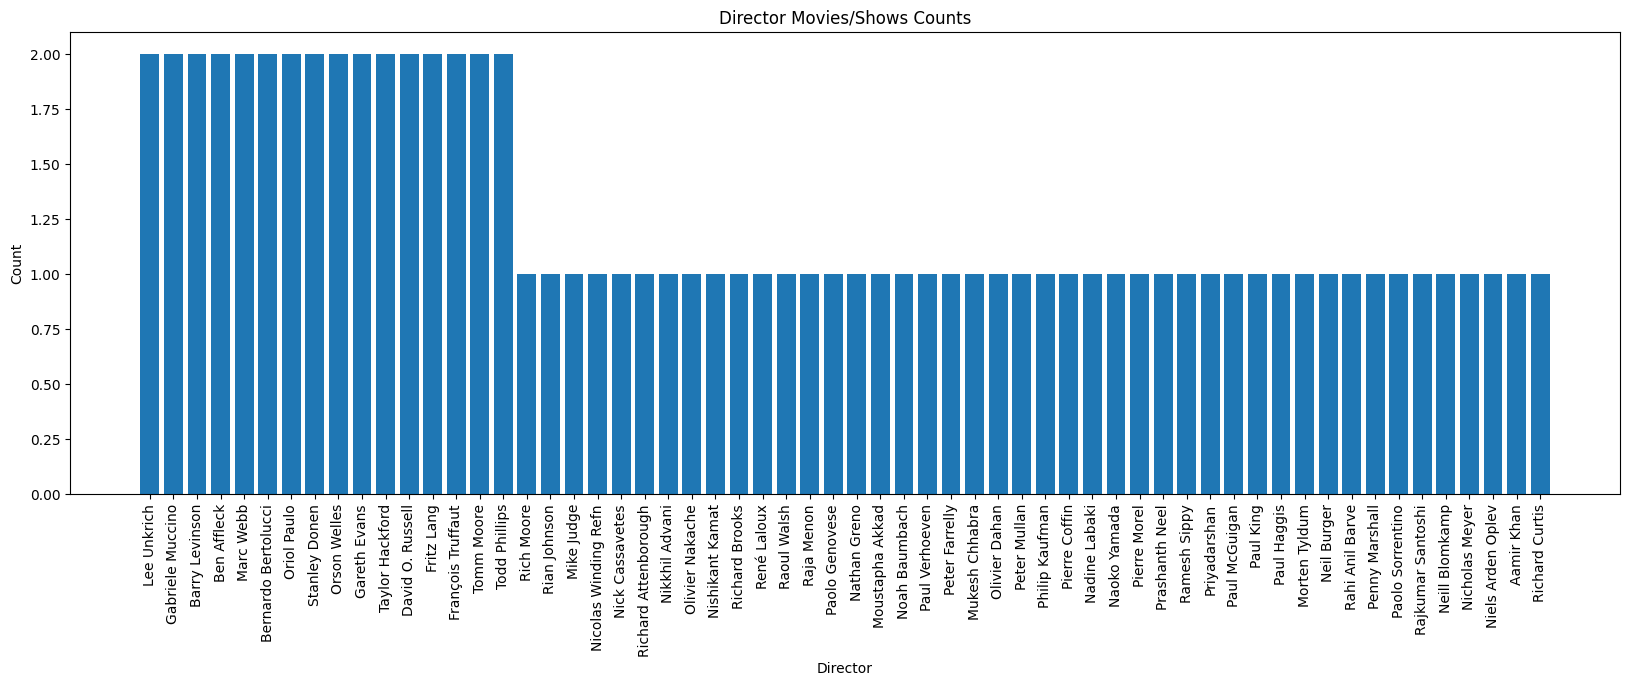

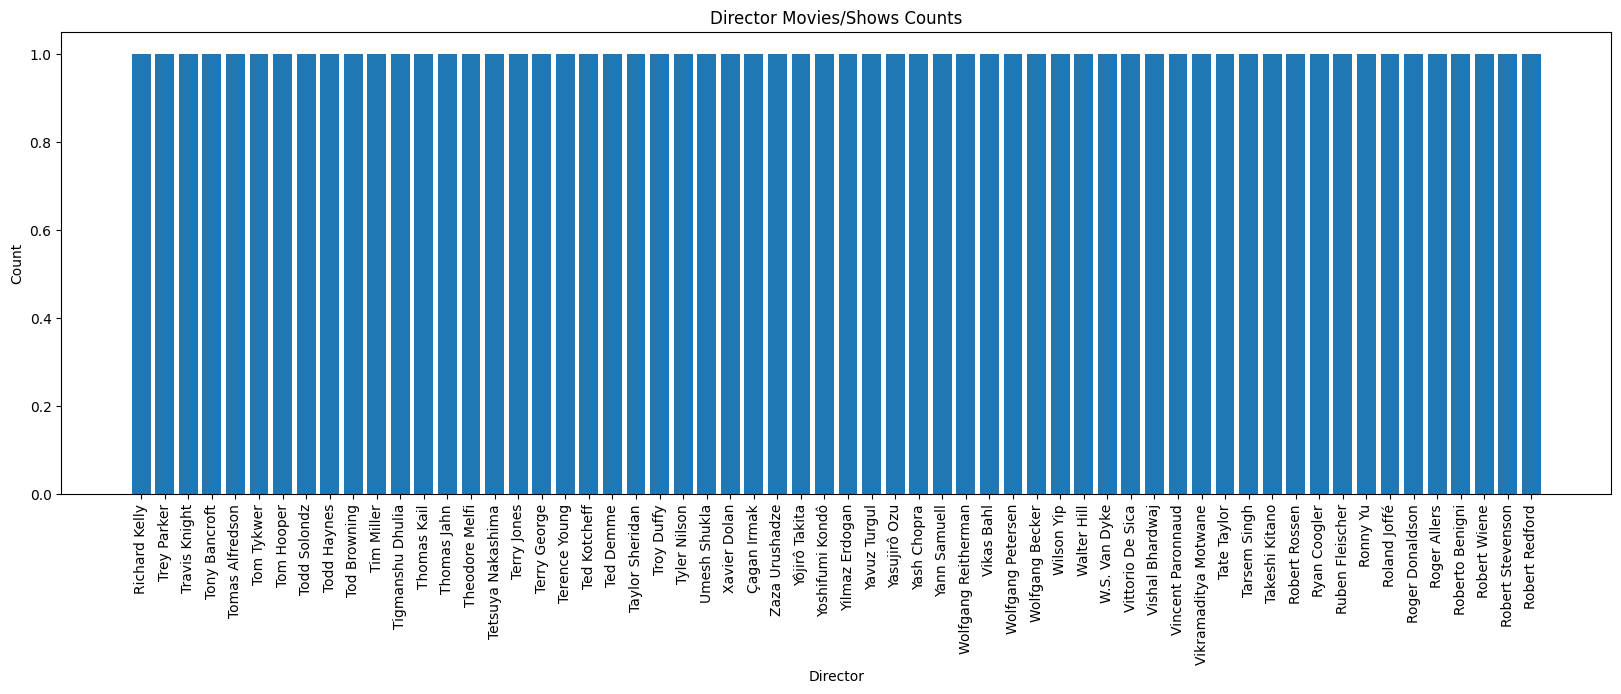

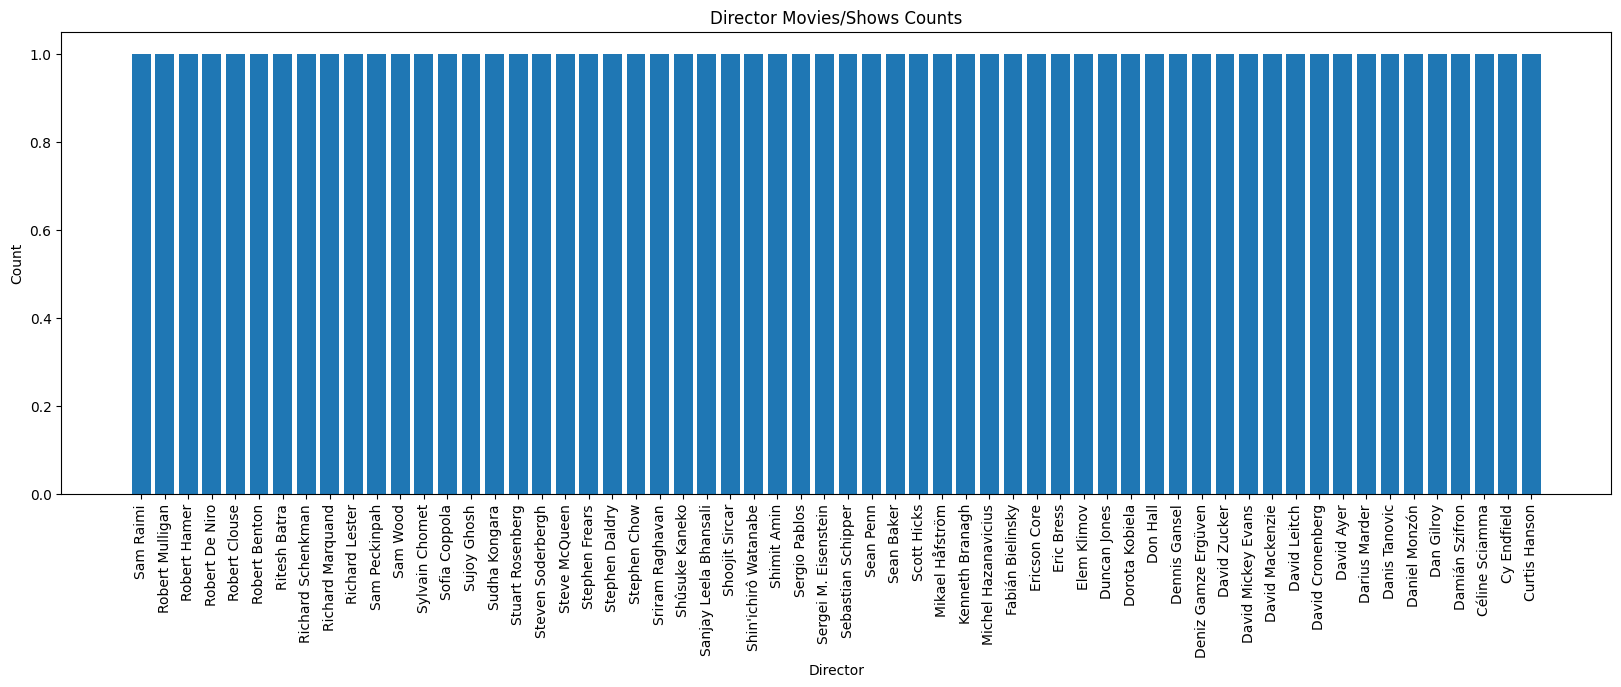

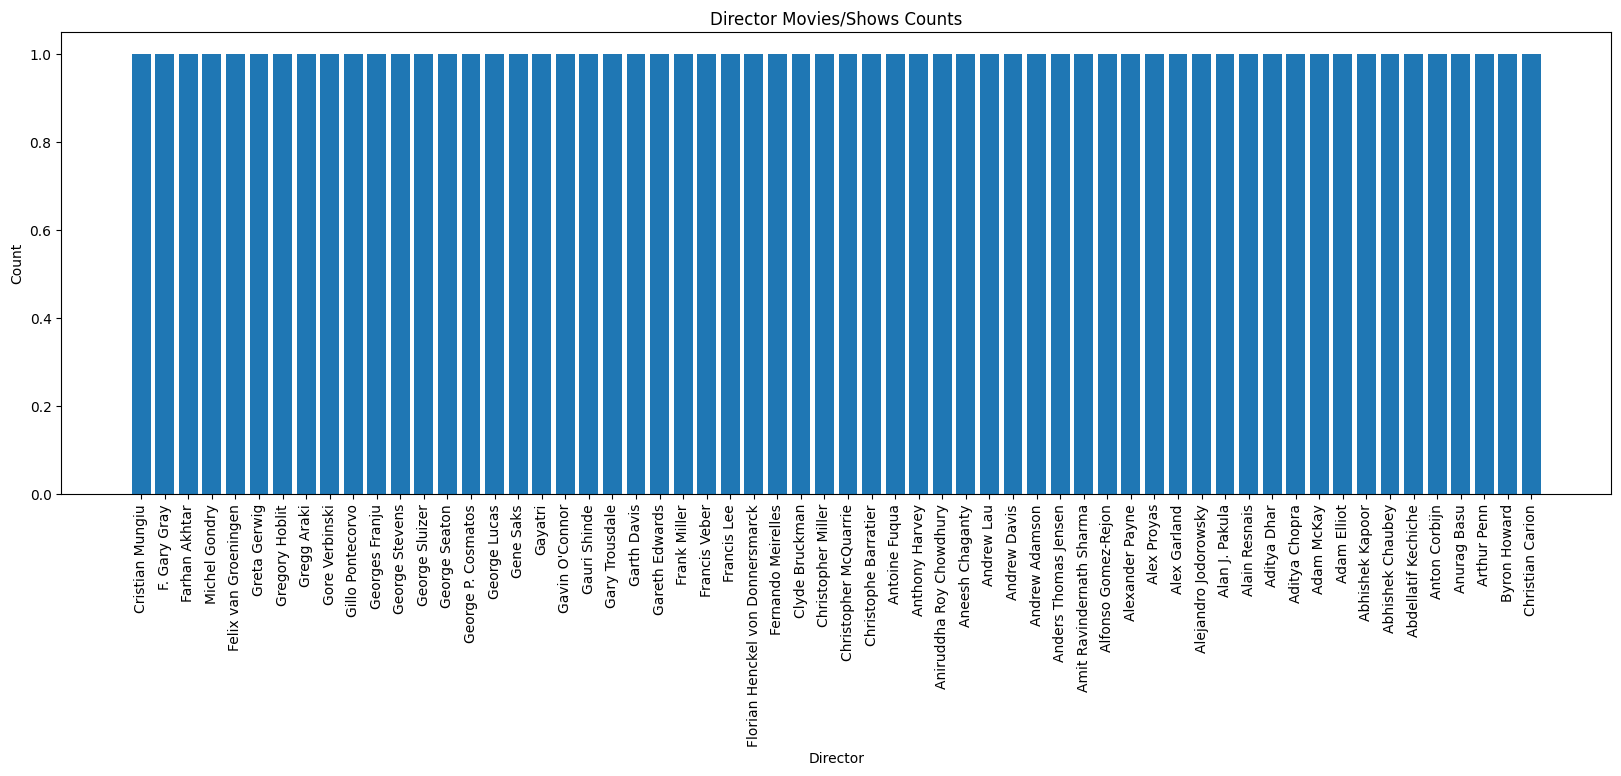

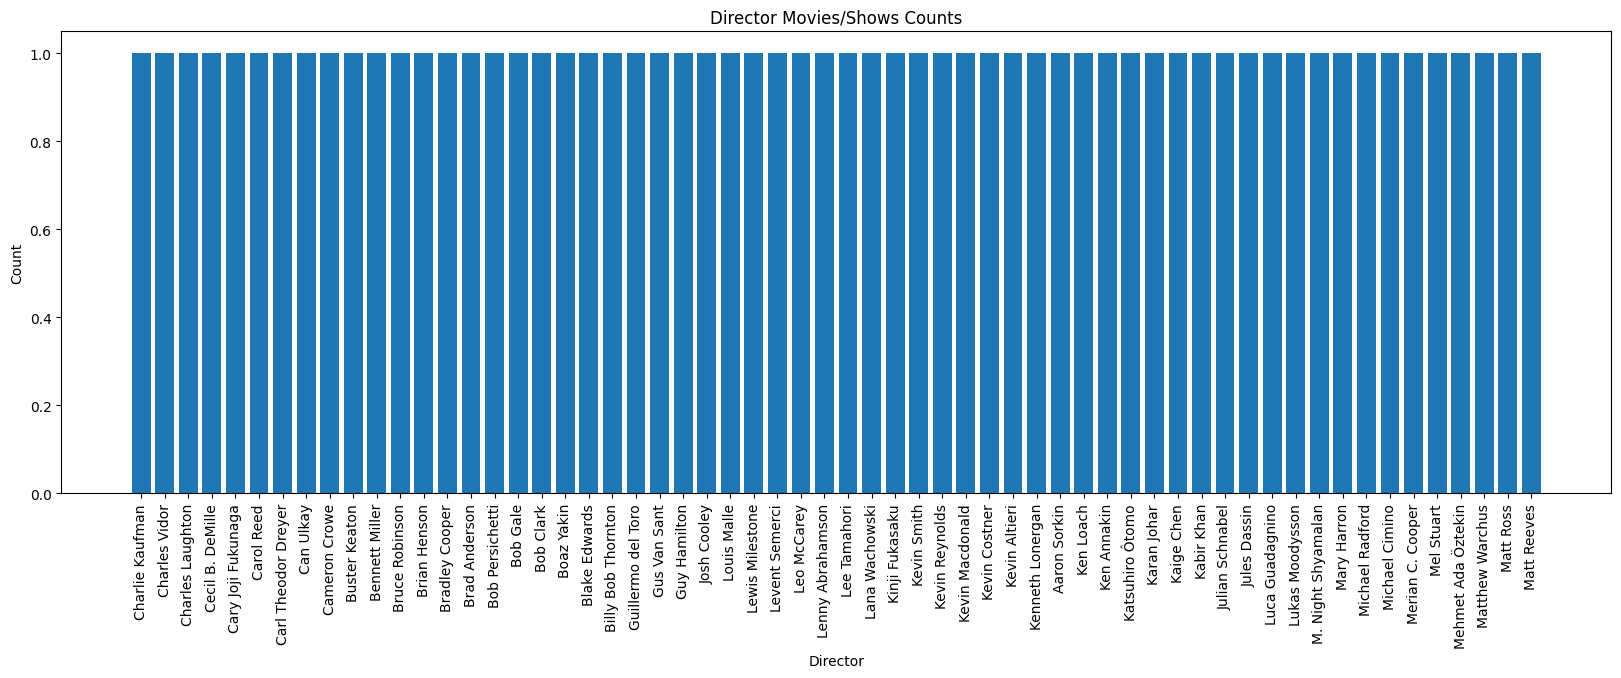

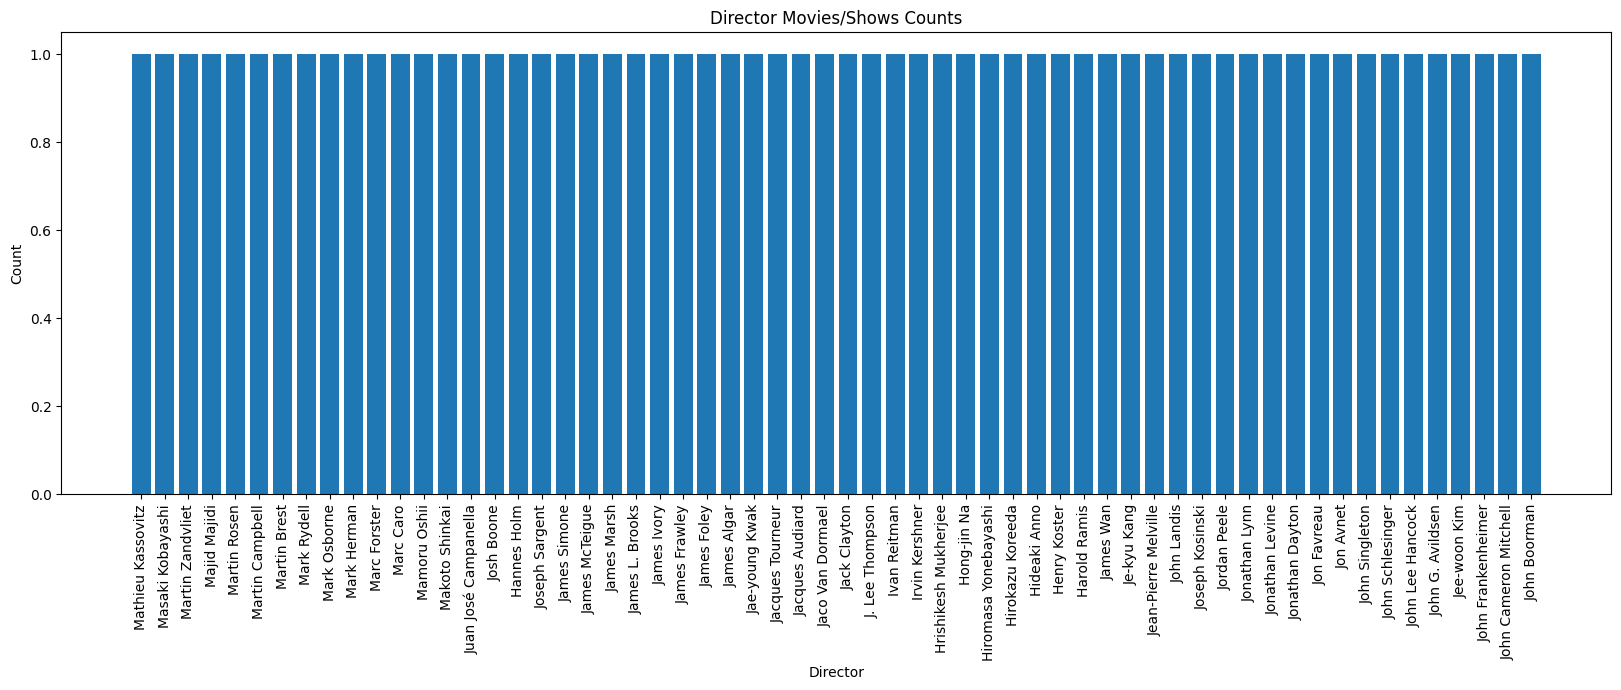

In [23]:
def plot_bar_chart(sub_df, x, y):
    plt.figure(figsize = (20, 6))
    plt.xlabel('Director')
    plt.ylabel('Count')
    plt.title('Director Movies/Shows Counts')
    plt.xticks(rotation=90)
    plt.bar(sub_df[x], sub_df[y])
    plt.show()

slice_size = 60
num_of_slices = len(movie_director_count) // slice_size

for i in range(num_of_slices):
    start = i * slice_size
    end = start + slice_size
    sub_df = movie_director_count[start:end]
    
    plot_bar_chart(sub_df, 'Director', 'Count')